In [1]:
pwd

u'/Users/mad/Documents/ mad/ publi/DOSY-W/newnew/Code_article/Code'

In [2]:
import sys
sys.path.append("/Users/mad/NPKV2")

In [3]:
import spike
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline


          SPIKE
    Version     : 0.9.0
    Date        : 08-09-2016
    Revision Id : 331
---- Importing  << Bruker_NMR_FT >>
     This plugin implement the set of Fourier Transform used for NMR
---- Importing  << Bucketing >>
     A set of tools for computing bucketing for 1D and 2D NMR spectra
---- Importing  << Fitter >>
     set of function for Peak fitter
---- Importing  << Linear_prediction >>
     plugin for the Linear Prediction algos into NPKDATA
---- Importing  << PALMA >>
     A plugin implementing the PALMA algorithm for DOSY computation
---- Importing  << Peaks >>
     set of function for Peak detections and display - 1D and 2D
---- Importing  << apmin >>
     Autmomatic phase correction for 1D NMR spectra
---- Importing  << bcorr >>
     set of function for the baseline correction
---- Importing  << fastclean >>
     A utility to set to zero all points below a ratio
---- Importing  << makebokeh >>
     Routine for making Bokeh plots 
---- Importing  << rem_ridge >>
    

In [4]:
def square(y1, y2, x1, x2):
    "draw a box from a zoom window"
    plt.plot([x1, x2, x2, x1, x1],[y1, y1, y2, y2, y1],'k:')

In [5]:
ls /Volumes/mad2/DOSY_LAURE/Chloro/*.gs2

/Volumes/mad2/DOSY_LAURE/Chloro/Chloro1_10_200k_0p01.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro1_16_100k_0p1.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro1_16_200k_0p01.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro1_20_200k_0p01.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro1_20_200k_0p02.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro1_20_200k_0p05.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro1_20_20k_0p1.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro2_10_200k_0p01.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro2_16_100k_0p1.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro2_16_200k_0p01.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro2_20_200k_0p01.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro2_20_200k_0p02.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro2_20_200k_0p05.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro2_20_20k_0p1.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro3_10_200k_0p01.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro3_16_100k_0p1.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro3_16_200k_0p01.gs2
/Volumes/mad2/DOSY_LAURE/Chloro/Chloro

In [6]:
def load(n1, dire='/Volumes/mad2/DOSY_LAURE/Chloro/'):
    d = spike.NPKData.NPKData(name=dire+n1)
    d.axis1 = spike.NPKData.LaplaceAxis(dfactor=205679.740327, dmin=50, dmax=10000,size=256)
    d.real()
    d.axis2.currentunit = 'ppm'
#    print d
    return d
def load1D(n1, dire='/Volumes/mad2/DOSY_LAURE/Chloro/'):
    d = spike.File.BrukerNMR.Import_1D(dire+n1+'/fid')
    d.apod_sin(0).zf(2).ft_sim().bruker_corr().phase(75,55).real().bcorr(xpoints=(575,3800))
    d.unit= 'ppm'
#    print d
    return d

In [7]:
d1 = load("Chloro1_20_200k_0p01.gs2")#load1D('Chloro1_161006/2/',dire='/DATA/pharma/Chloro/')
d2 = load1D('Chloro1_161006/2/',dire='/DATA/pharma/Chloro/')
print d1.axis2.report()
print d2.axis1.report()

loading 2D
NMR axis at 700.163380 MHz,  4096 real points,  from -1.189706 ppm (-832.988604 Hz) to 10.832500 ppm  (7584.519814 Hz)
NMR axis at 700.163380 MHz,  16384 real points,  from -1.189706 ppm (-832.988604 Hz) to 10.832500 ppm  (7584.519814 Hz)


In [8]:
def fig1(d1, d1d, scale=2, z=[4.2,0.5]):
    # build the first figure 
    absmax = 10000000. #d.get_buffer().max()
    plt.figure(figsize=(10,4.5))
    fig = plt.axes([0.1,0.1,0.9,0.65]) # left, bottom, width, height
    d1.display(scale=scale, absmax=absmax, zoom=(50,5000, z[0], z[1]), figure=fig, ylabel=r'Diffusion $\mu m^2 s^{-1}$')
    plt.plot([2.5, 0.7],[220,220],'k--')
    plt.plot([3.95, 3.55],[380,380],'k--')
    plt.plot([3.25, 3.4],[1100,1100],'k--')
    
    MeOH = 3.325
    Fat = 1.3
#    plt.plot([MeOH,MeOH],[50,5000],'r:')
#    plt.plot([Fat,Fat],[50,5000],'g:')
    
    fig1 = plt.axes([0.1,0.75,0.9,0.2], xticks=[], yticks=[], frameon=False, ) # left, bottom, width, height
    fig1.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
    fig1.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
    left = d1d.axis1.ptoi(z[0])
    right = d1d.axis1.ptoi(z[1])
    fig1.plot(d1d.get_buffer(), 'k')#[left:right])
    fig1.set_xlim( left,right)
    fig1.set_ylim(ymax=2E8)
#    d1d.display(scale=10, zoom=z,figure=fig1)
    plt.savefig("Chloro.pdf")

loading 2D


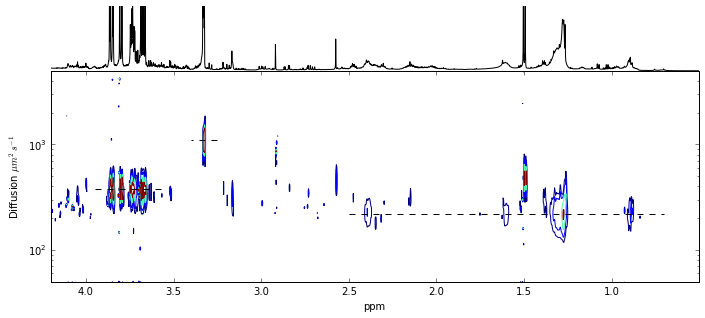

In [9]:
fig1(load("Chloro1_20_200k_0p01.gs2"), load1D('Chloro1_161006/2/',dire='/DATA/pharma/Chloro/'))

1D data-set
Axis F1 :NMR axis at 700.163380 MHz,  16384 real points,  from -1.189706 ppm (-832.988604 Hz) to 10.832500 ppm  (7584.519814 Hz)
data-set is real

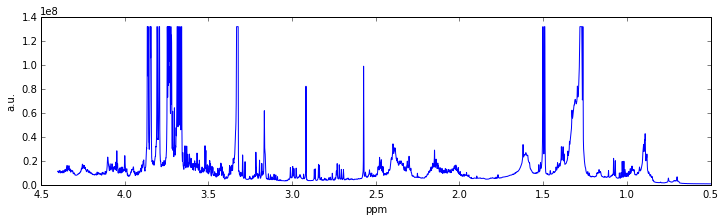

In [10]:
%matplotlib inline
d1d = load1D('Chloro1_161006/2/',dire='/DATA/pharma/Chloro/')
plt.figure(figsize=(12,3))
f = plt.gca()
d1d.display(scale=10, zoom=(4.4, 0.5),figure=f)

loading 2D


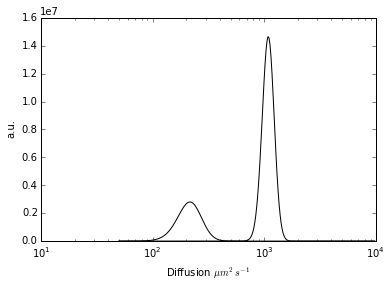

In [11]:
def fig1c(d1):
    d1.col(d1.axis2.ptoi(3.325)).display(color='k')
    d1.col(d1.axis2.ptoi(1.274)).display(color='k',new_fig=False,xlabel=r'Diffusion $\mu m^2 s^{-1}$')
    plt.savefig("col.pdf")
fig1c(load("Chloro1_20_200k_0p01.gs2"))

In [12]:
def fig2(d1, d2, d1d, scale=8):
    absmax = 10000000. #d.get_buffer().max()
    figg = plt.figure(figsize=(16,5))
#    f, (F1, F2, F2, F4) = plt.subplot(2,2,sharex='col', sharey='row')
    i = 1
    D = 270.0 # um^2 sec-1
#    f, plots = plt.subplots(2,2, sharex='col', sharey='row')
    for d in [d1, d2]:
        fig = plt.subplot(2,2,i+1)
        d.display(scale=scale, absmax=absmax, zoom=(50,10000, 3.0, 0.6), figure=fig)
        if i==3: plt.plot([1.9, 1.7],[D,D],'k--')
        if i==3: plt.plot([1.6, 0.7],[220,220],'k--')
        fig = plt.subplot(2,2,i+0)
        d.display(scale=2*scale, absmax=absmax, zoom=(50,10000, 10.0, 6), figure=fig)
        if i==3: plt.plot([9,6.5],[D,D],'k--')
        i = i+2
    #square(350,750,1.55, 1.45)
    plt.savefig("Chloroz.pdf")

loading 2D
loading 2D


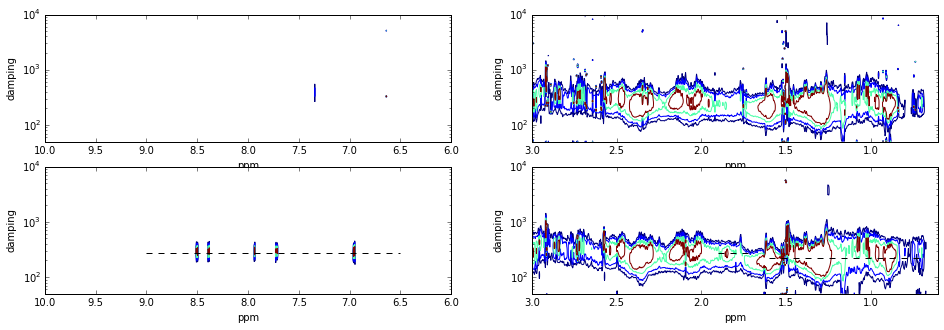

In [18]:
#fig2(load("Chloro1_20_200k_0p05.gs2"),load("Chloro3_20_200k_0p05.gs2"),scale=8) 
#fig2(load("Chloro1_20_200k_0p02.gs2"),load("Chloro3_20_200k_0p02.gs2"),scale=8)
d1d = load1D('Chloro3_161006/2/',dire='/DATA/pharma/Chloro/')
fig2(load("Chloro1_10_200k_0p01.gs2"), load("Chloro3_10_200k_0p01.gs2"), d1d, scale=50)

loading 2D
loading 2D


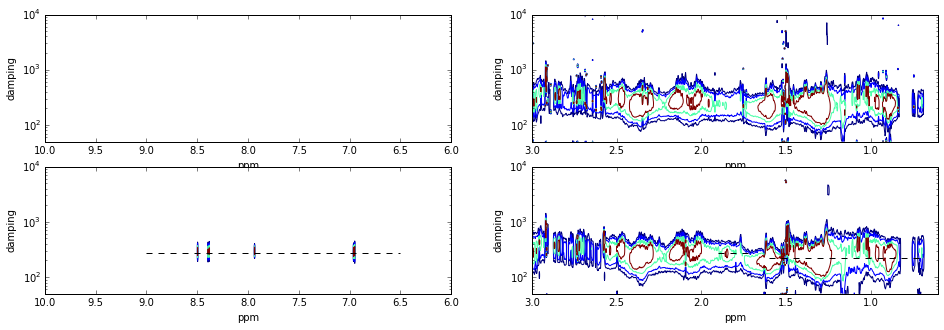

In [19]:
#fig2(load("Chloro1_20_200k_0p05.gs2"),load("Chloro3_20_200k_0p05.gs2"),scale=8) 
#fig2(load("Chloro1_20_200k_0p02.gs2"),load("Chloro3_20_200k_0p02.gs2"),scale=8)
d1d = load1D('Chloro3_161006/2/',dire='/DATA/pharma/Chloro/')
fig2(load("Chloro1_20_200k_0p01.gs2"), load("Chloro3_20_200k_0p01.gs2"), d1d, scale=50)

In [20]:
def fig2n(d1, d2, d1d, scale=8):
    absmax = 10000000. #d.get_buffer().max()
    plt.figure(figsize=(16,7))
    L = 0.05
    R = 0.4
    spacing = 0.02
    WL = R-L-spacing
    WR = 0.9-R
    figLu = plt.axes([L,0.433,WL,0.33]) # left, bottom, width, height
    figRu = plt.axes([R,0.433,WR,0.33]) # left, bottom, width, height
    figRu.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())

    figLd = plt.axes([L,0.1,WL,0.33]) # left, bottom, width, height
    figRd = plt.axes([R,0.1,WR,0.33]) # left, bottom, width, height
    figRd.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())

    fig1L = plt.axes([L,0.75,WL,0.2], xticks=[], yticks=[], frameon=False, ) # left, bottom, width, height
    fig1R = plt.axes([R,0.75,WR,0.2], xticks=[], yticks=[], frameon=False, ) # left, bottom, width, height
    
    D = 285.0 # um^2 sec-1
    d1.display(scale=scale, absmax=absmax, zoom=(50,10000, 3.05, 0.6), figure=figRd, ylabel="")
    d1.display(scale=4*scale, absmax=absmax, zoom=(50,10000, 9.0, 6.5), figure=figLd, ylabel=r'Diffusion $\mu m^2 s^{-1}$')

    d2.display(scale=scale, absmax=absmax, zoom=(50,10000, 3.05, 0.6), figure=figRu, ylabel="")
    figRu.plot([1.9, 1.7],[D,D],'k--')
    d2.display(scale=2*scale, absmax=absmax, zoom=(50,10000, 9.0, 6.5), figure=figLu, ylabel=r'Diffusion $\mu m^2 s^{-1}$')
    figLu.plot([8.8,6.8],[D,D],'k--')

    for f, z, in zip([fig1L, fig1R],[[9,6.5],[3.05,0.6]]):
        f.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
        f.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
        left = d1d.axis1.ptoi(z[0])
        right = d1d.axis1.ptoi(z[1])
        f.plot(d1d.get_buffer(), 'k')#[left:right])
        f.set_xlim( left,right)
        if f is fig1L:
            f.set_ylim(ymin=-2E6,ymax=1E7)
        else:
            f.set_ylim(ymin=0,ymax=4E7)

    plt.savefig("Chloroz.pdf")

loading 2D
loading 2D


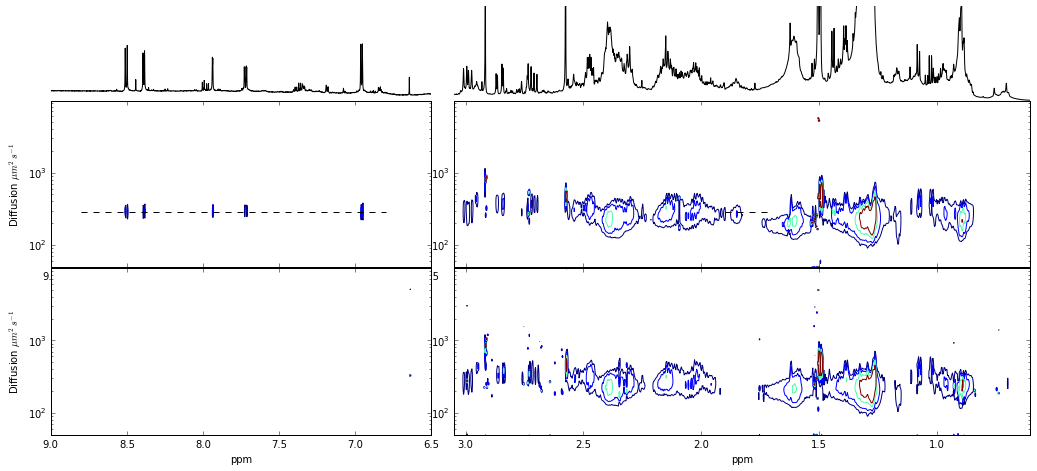

In [21]:
fig2n(load("Chloro1_10_200k_0p01.gs2"), load("Chloro3_10_200k_0p01.gs2"), d1d, scale=8)

loading 2D
loading 2D


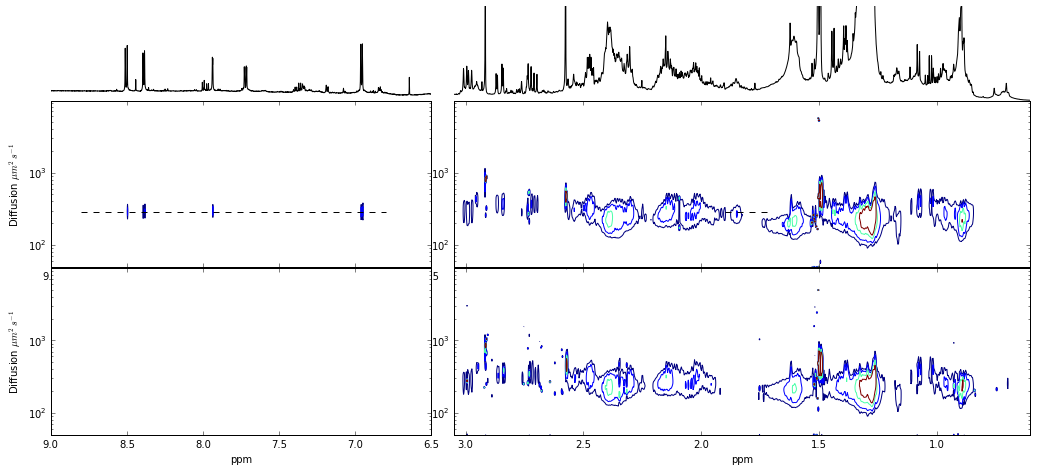

In [88]:
fig2n(load("Chloro1_20_200k_0p01.gs2"), load("Chloro3_20_200k_0p01.gs2"), d1d, scale=8)

In [ ]:
d1.display()

In [ ]:
d1d = load1D('Chloro3_161006/2/',dire='/DATA/pharma/Chloro/')
plt.figure(figsize=(16,4))
f=plt.subplot(1,2,1)
d1d.display(zoom=(10.0, 6),figure=f)
plt.ylim(ymax=1E8)
f=plt.subplot(1,2,2)
d1d.display(zoom=(3, 0.6),figure=f)
plt.ylim(ymax=1E8)